SVM, logistic, knn, decision tree, random forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('cc_approvals.data')

In [3]:
cols = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel','Ethnicity',
'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen',
'ZipCode', 'Income', 'ApprovalStatus']
df.columns = cols


In [4]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [7]:
categortical_features = ['Gender', 'Married', 'BankCustomer', 'EducationLevel','Ethnicity',
'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ApprovalStatus']

le = LabelEncoder()
for feature in categortical_features:
    df[feature] = le.fit_transform(df[feature])

In [16]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,00043,560,0
1,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,00280,824,0
2,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,00100,3,0
3,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,00120,0,0
4,2,32.08,4.000,2,1,10,8,2.50,1,0,0,1,0,00360,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2,21.08,10.085,3,3,5,4,1.25,0,0,0,0,0,00260,0,1
685,1,22.67,0.750,2,1,2,8,2.00,0,1,2,1,0,00200,394,1
686,1,25.25,13.500,3,3,6,3,2.00,0,1,1,1,0,00200,1,1
687,2,17.92,0.205,2,1,1,8,0.04,0,0,0,0,0,00280,750,1


C:\Users\RAJ\AppData\Local\Temp\ipykernel_1704\889167330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot:>

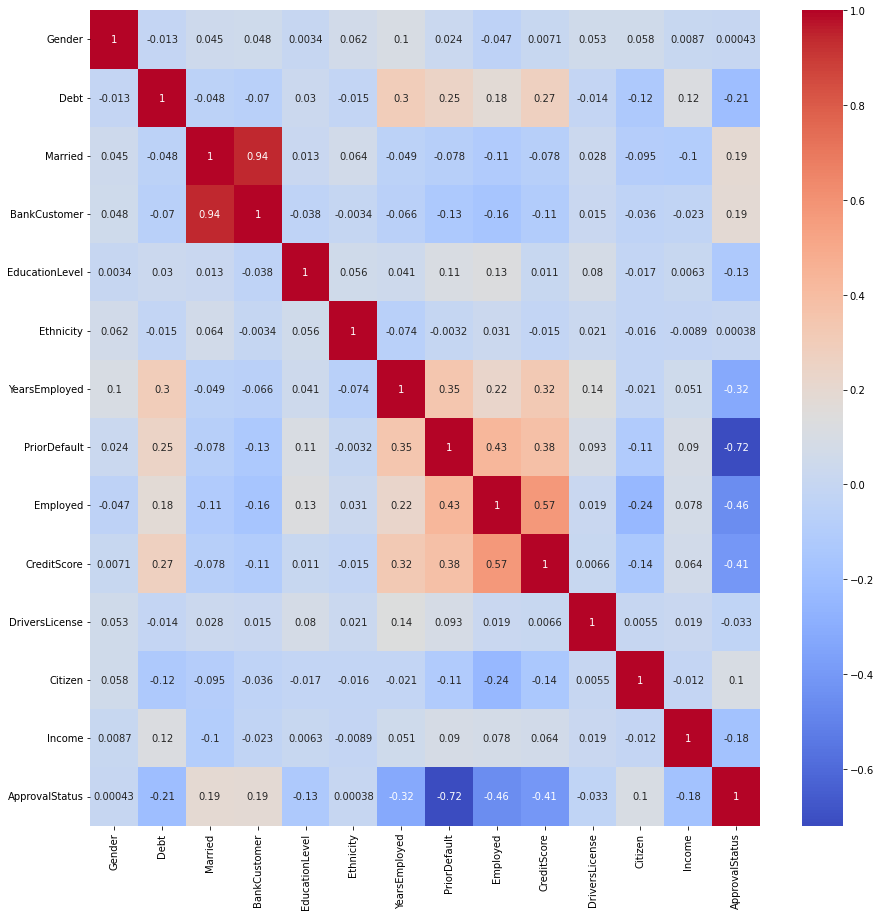

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')


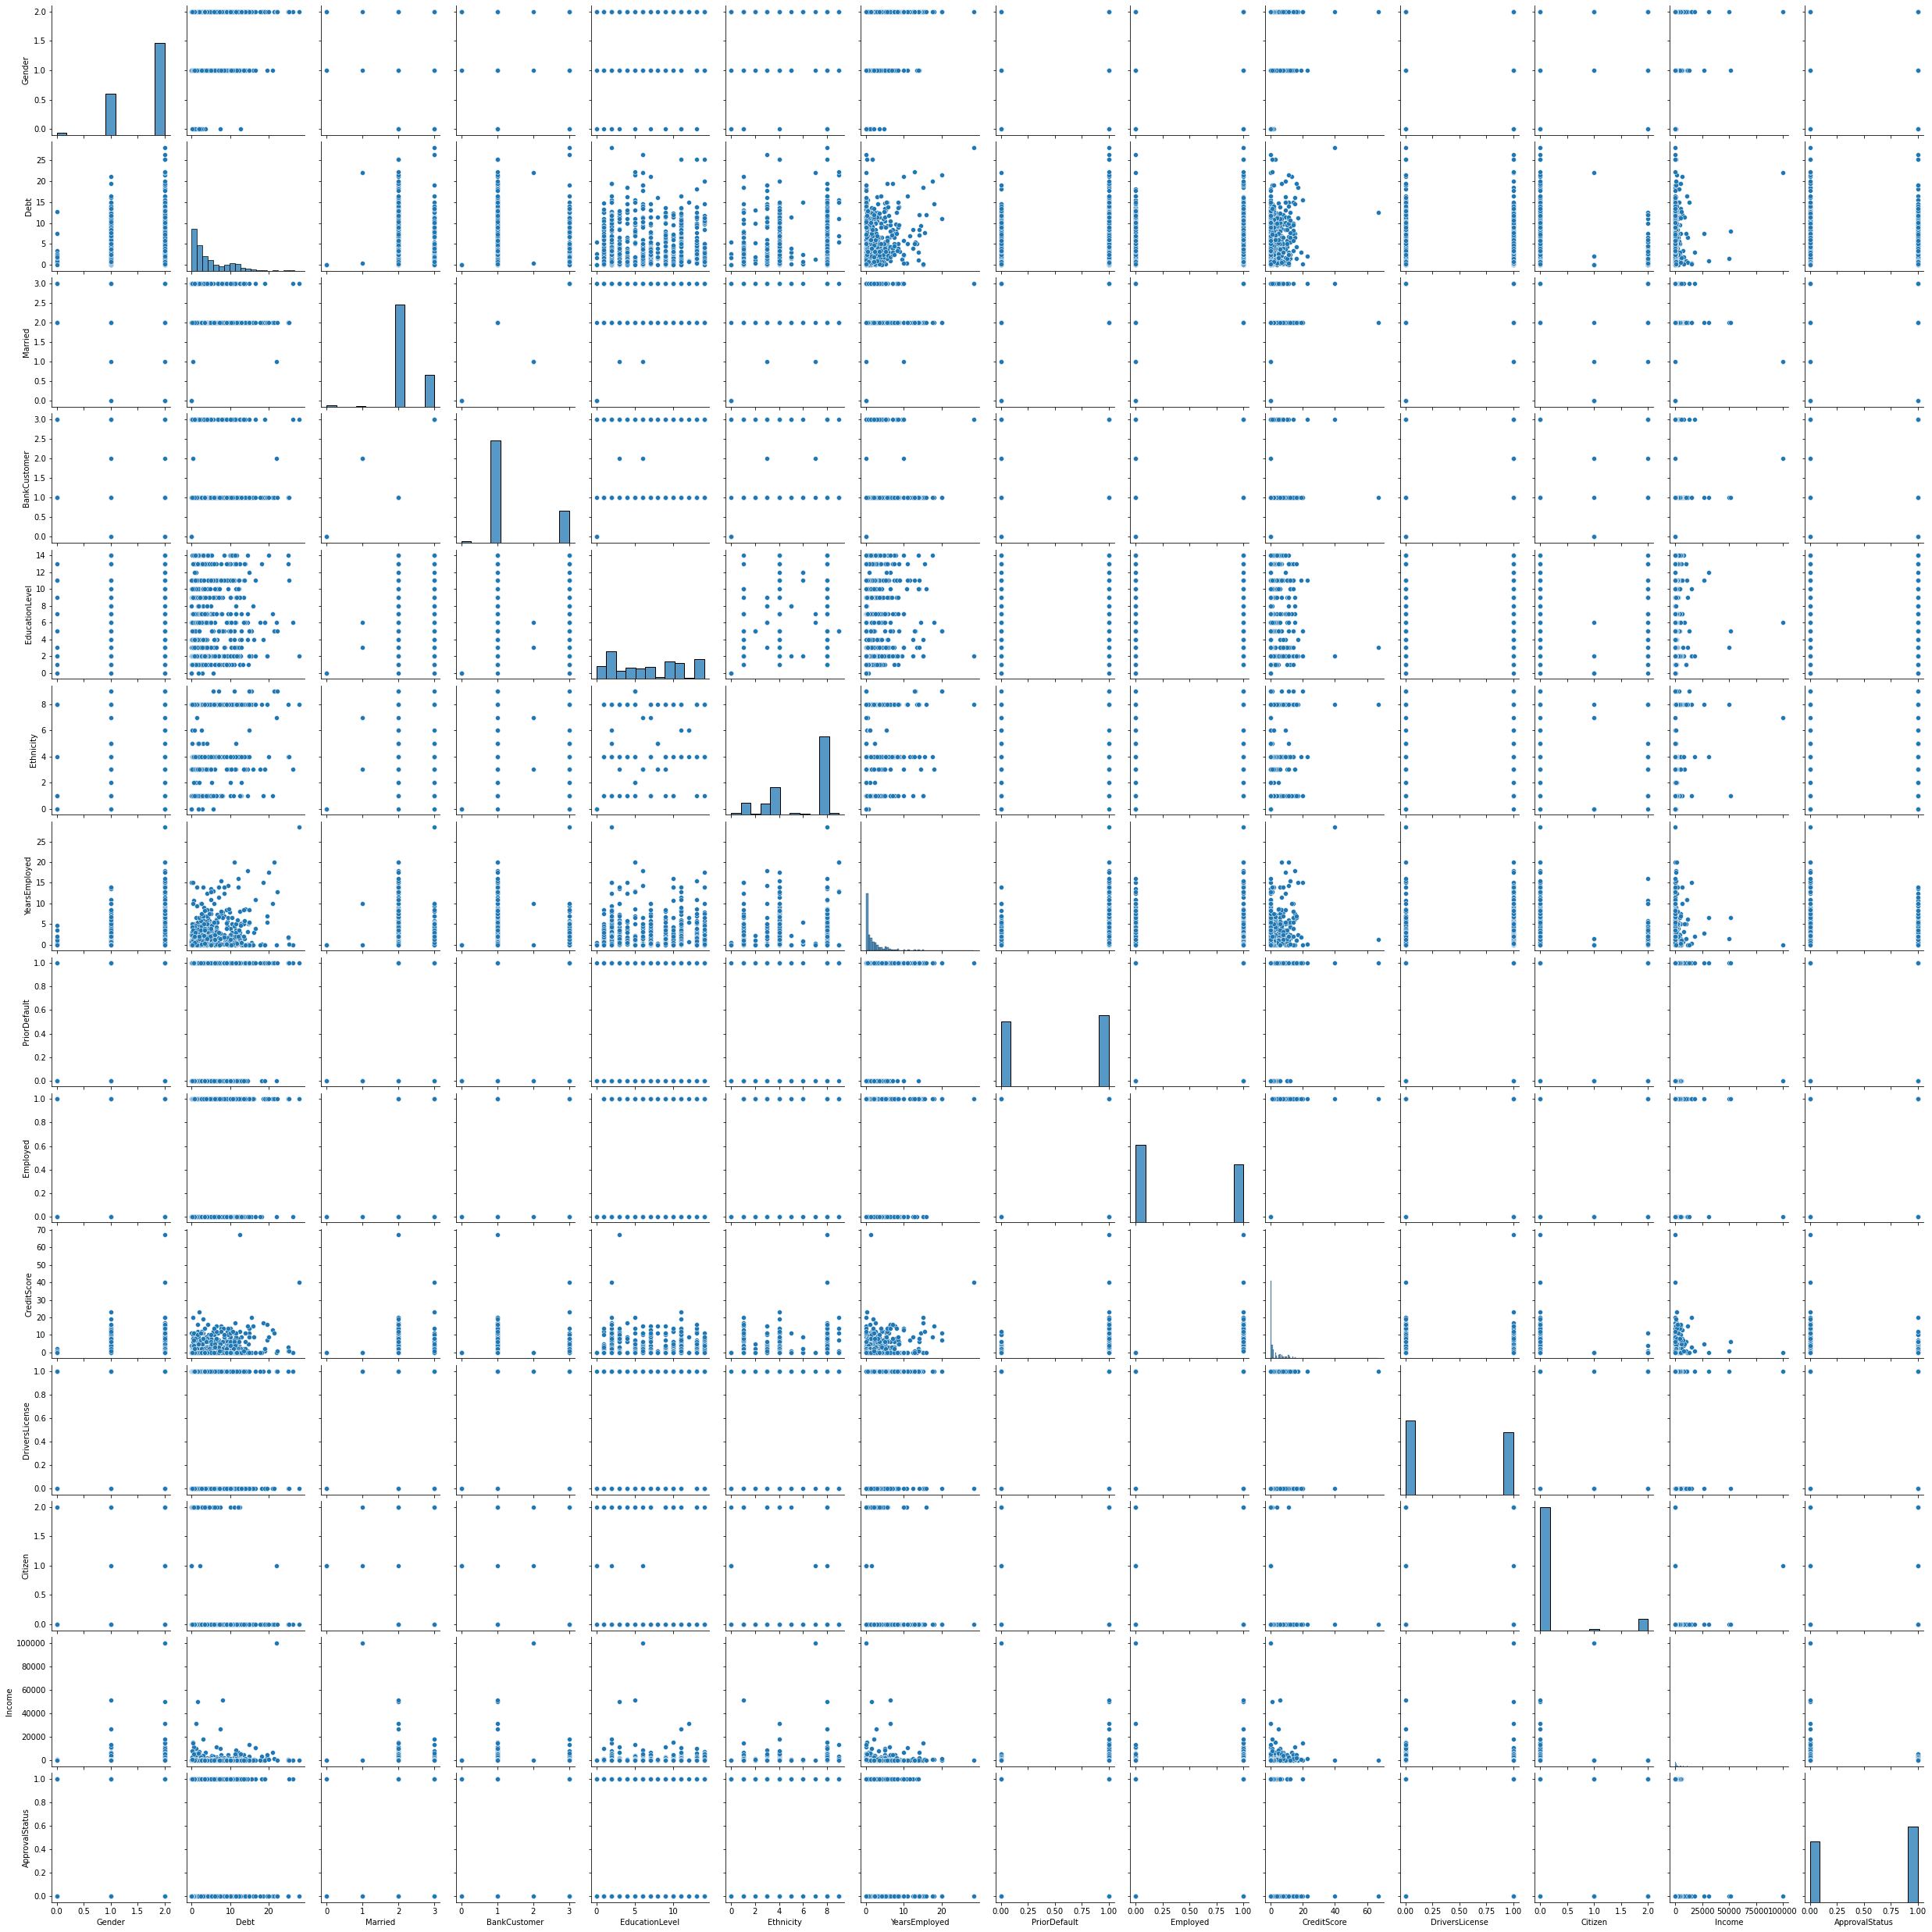

In [9]:
sns.pairplot(df)

In [10]:
selected_features = ['YearsEmployed','PriorDefault', 'Employed', 'CreditScore']
X = df[selected_features]
y = df['ApprovalStatus']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [15]:
for model_name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    confusion_mat = confusion_matrix(y_test,y_pred)
    classification_rep = classification_report(y_test,y_pred)
    
    print(f'\n {model_name} Model: ' )
    print(f'Accuracy: {accuracy}' )
    print(f'Confusion Matrix: {confusion_mat}')
    print(f'Classification Report: {classification_rep}' )
    print('-----------------------------------------------------------------------------------')


 SVM Model: 
Accuracy: 0.8768115942028986
Confusion Matrix: [[59  4]
 [13 62]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.94      0.87        63
           1       0.94      0.83      0.88        75

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

-----------------------------------------------------------------------------------

 KNN Model: 
Accuracy: 0.855072463768116
Confusion Matrix: [[51 12]
 [ 8 67]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.81      0.84        63
           1       0.85      0.89      0.87        75

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138

---------------------------------------------------------